In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Создание искусственного набора данных
np.random.seed(0)
X = np.random.rand(100, 8)  # 100 объектов, 8 признаков
y = np.random.randint(0, 2, 100)  # 100 объектов, 2 класса

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Построение классификационного правила
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Оценка качества построенного правила
y_pred_train = lda.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Точность на обучающей выборке: {accuracy_train:.2f}')

# Классификация новых объектов
y_pred_test = lda.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Точность на тестовой выборке: {accuracy_test:.2f}')

Точность на обучающей выборке: 0.60
Точность на тестовой выборке: 0.40


Adjusted Rand Index: 0.00


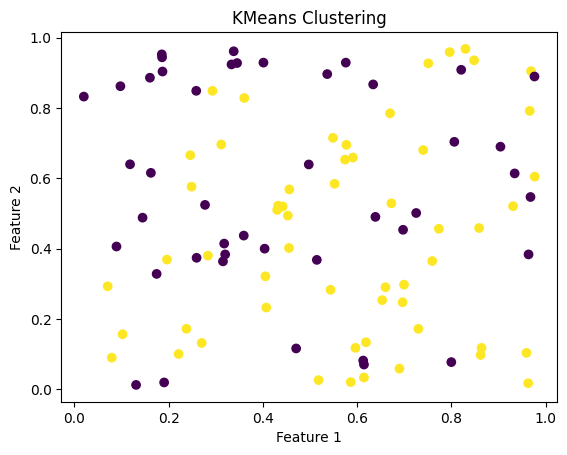

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt

# Кластеризация данных
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Сравнение результатов кластеризации с оригинальной разметкой
ari_score = adjusted_rand_score(y, clusters)
print(f'Adjusted Rand Index: {ari_score:.2f}')

# Визуализация кластеров
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

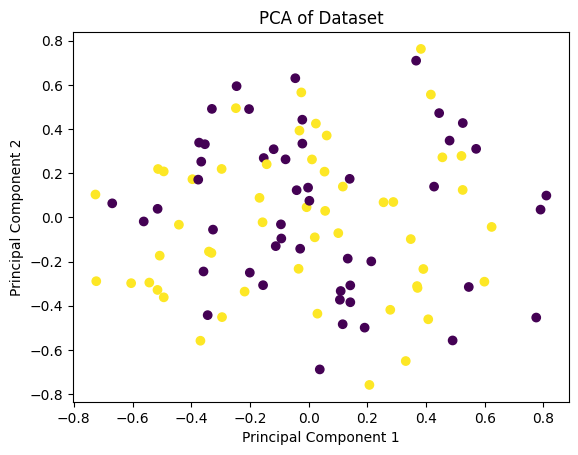

Доля объясненной дисперсии: [0.19440517 0.17059207]
Количество компонентов для объяснения 90% дисперсии: 7


In [3]:
from sklearn.decomposition import PCA

# Применение PCA для снижения размерности до 2 компонентов
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация двух главных компонент
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', marker='o')
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Объясненная дисперсия
explained_variance = pca.explained_variance_ratio_
print(f'Доля объясненной дисперсии: {explained_variance}')

# Количество компонентов для объяснения 90% дисперсии
pca_full = PCA().fit(X)
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f'Количество компонентов для объяснения 90% дисперсии: {n_components_90}')

In [9]:
import numpy as np
import pandas as pd
from scipy.linalg import inv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Чтение данных из Excel
data = pd.read_excel('ms-data3.xlsx', sheet_name='3', header=None)
vyborka = data.iloc[1:21, 0:8].values
class_labels = data.iloc[1:21, 9].values
data_combined = np.hstack((vyborka, class_labels.reshape(-1, 1)))

group1 = data_combined[:10, :8]
group2 = data_combined[10:20, :8]

new_data = data.iloc[22:32, 0:8].values
data30 = np.vstack((vyborka, new_data))

print("1. Дискриминантный анализ")
print("Классификационное правило")

n1 = group1.shape[0]
n2 = group2.shape[0]

print(f"Размер группы 1: {n1}")
print(f"Размер группы 2: {n2}")

print("Вычисляем среднее значение для каждой группы по столбцам")
sred1 = np.mean(group1, axis=0)
sred2 = np.mean(group2, axis=0)

print(f"Среднее значение для группы 1: {sred1}")
print(f"Среднее значение для группы 2: {sred2}")

print("Вычисляем ковариацию")
try:
    cov1 = np.cov(group1, rowvar=False)
    cov2 = np.cov(group2, rowvar=False)
    
    print(f"Ковариационная матрица для группы 1: \n{cov1}")
    print(f"Ковариационная матрица для группы 2: \n{cov2}")
except Exception as e:
    print(f"Ошибка при вычислении ковариации: {e}")


# print("Вычисляем матрицу, обратную к объединенной ковариационной матрице")
# pooled_cov = ((n1 * cov1 + n2 * cov2) / (n1 + n2 - 2))
# unbiased_estimates = inv(pooled_cov)

# print("Вектор коэффициентов канонической дискриминантной функции")
# A = unbiased_estimates @ (sred1 - sred2)

# print('Значения дискриминантной функции для каждого объекта')
# df1 = group1 @ A
# df2 = group2 @ A

print(f"Дискриминантные функции для группы 1: {df1}")
print(f"Дискриминантные функции для группы 2: {df2}")

print("Вычисляем средние значения")
sreddf1 = np.mean(df1)
sreddf2 = np.mean(df2)

print(f"Среднее значение дискриминантной функции для группы 1: {sreddf1}")
print(f"Среднее значение дискриминантной функции для группы 2: {sreddf2}")

print("Коэффициент дискриминации")
c = (sreddf1 + sreddf2) / 2
print(f"Коэффициент дискриминации: {c}")

print('Распределение проверочной выборки')
dfnew = new_data @ A

for value in dfnew:
    if value < c:
        print('1')
    else:
        print('2')

print('Проверка встроенной функцией')
lda = LDA()
lda.fit(vyborka, class_labels)
classification = lda.predict(new_data)
print(f"Классификация новой выборки: {classification}")

print("Оцениваем достоверность дискриминантного анализа")
fmax = np.max(dfnew)
exp_diffs = np.exp(dfnew - fmax)
p = 1 / np.sum(exp_diffs)
print(f"Достоверность: {p}")

1. Дискриминантный анализ
Классификационное правило
Размер группы 1: 10
Размер группы 2: 10
Вычисляем среднее значение для каждой группы по столбцам
Среднее значение для группы 1: [9.5931 6.6676 0.8687000000000005 5.6683 -16.1421 1.3783
 1.2328999999999999 1.1079999999999999]
Среднее значение для группы 2: [0.45409999999999984 28.1252 11.3974 11.0401 -27.820600000000002 10.0717
 4.6015999999999995 11.167100000000001]
Вычисляем ковариацию
Ошибка при вычислении ковариации: 'float' object has no attribute 'shape'
Вычисляем матрицу, обратную к объединенной ковариационной матрице


NameError: name 'cov1' is not defined

In [5]:
group1

array([[13.829, 13.054, 2.072, 9.316, -75.047, 0.728, -5.127, 0.52],
       [13.595, 14.198, 1.949, 4.541, 23.833, -0.557, 8.205, 2.712],
       [15.199, 12.208, 2.295, 6.44, -7.98, 3.087, 4.551, 1.538],
       [3.449, 2.002, 2.87, 7.656, -36.83, 0.339, -2.888, 1.273],
       [9.297, 1.674, 7.481, 6.199, -2.556, 4.813, 4.066, 0.943],
       [13.285, 17.957, 1.687, 4.993, 5.851, -4.215, 5.515, 1.177],
       [6.74, -4.922, -0.852, 2.361, 1.984, 5.337, 1.861, 0.683],
       [7.929, 7.038, 2.152, 9.282, -72.814, 0.48, -6.536, 1.354],
       [4.929, -0.397, -14.155, 4.212, -1.863, 1.782, -0.63, 1.036],
       [7.679, 3.864, 3.188, 1.683, 4.001, 1.989, 3.312, -0.156]],
      dtype=object)